# Watershed Segmentation Tutorial

**To get function help, click within the function parentheses then click shift+tab**

**Remember to use tab for autocompletion**

The Watershed Segmentation Function is a PlantCV function based on code contributed by Suxing Liu, Arkansas State University. 
For more information see https://github.com/lsx1980/Leaf_count. 
This function uses the watershed algorithm to detect boundary of objects. 
Needs a mask file which specifies area which is object is white, and background is black. 

In [7]:
# Set the notebook display method
# If widget is not working, then change to inline
%matplotlib widget

# Section 1: Importing Image and Libraries

In [8]:
# Import libraries
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

# Print out the version of PlantCV being used by the Jupyter kernel
pcv.__version__

'4.8.dev4+g438ee392'

## Input/Output variables

The options class mimics the workflow command-line argument parser that is used for workflow parallelization. Using it while developing a workflow in Jupyter makes it easier to convert the workflow to a script later.

In [9]:
# Input/output options
args = WorkflowInputs(
    images=["./img/arabidopsis.jpg"],
    names="image1",
    result="segmentation_results.json",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

In [10]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

## Read the input image

### Reading images into your environment using *pcv.readimage()*
Inputs:
   * filename = Image file to be read in
   * mode     = How the image will be read into the notebook; either 'native' (default), 'rgb', 'gray', 'csv', or 'envi'

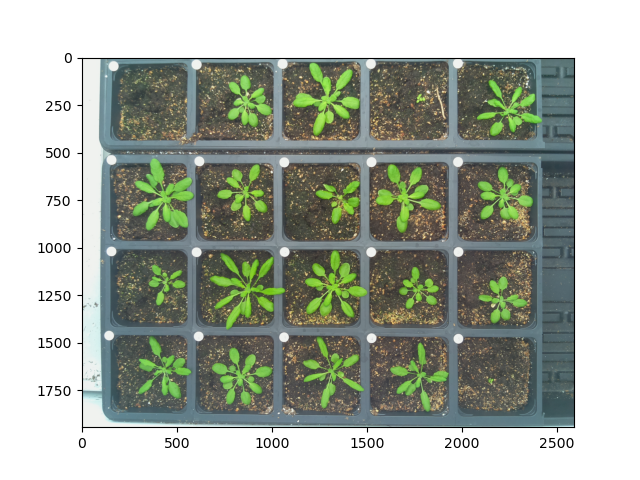

In [11]:
img, path, filename = pcv.readimage(filename=args.image1)

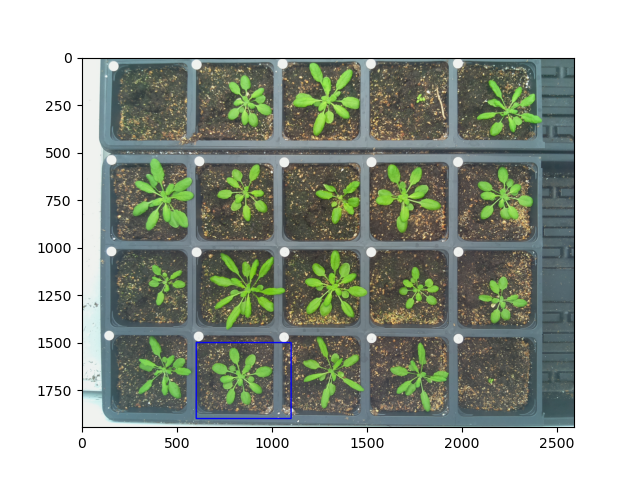

In [12]:
# Crop the image down to focus on just one plant

crop_img = pcv.crop(img=img, x=600, y=1500, h=400, w=500)

Use `plantcv.visualize.colorspaces` to visualize colorspaces with good contrast between target object (plant) and background. In this case the A channel has good contrast between plants and background. This step would not go into a workflow when you run it in parallel

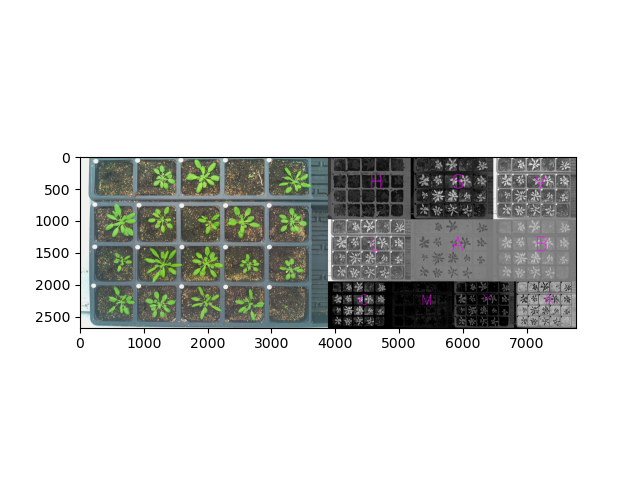

In [13]:
colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

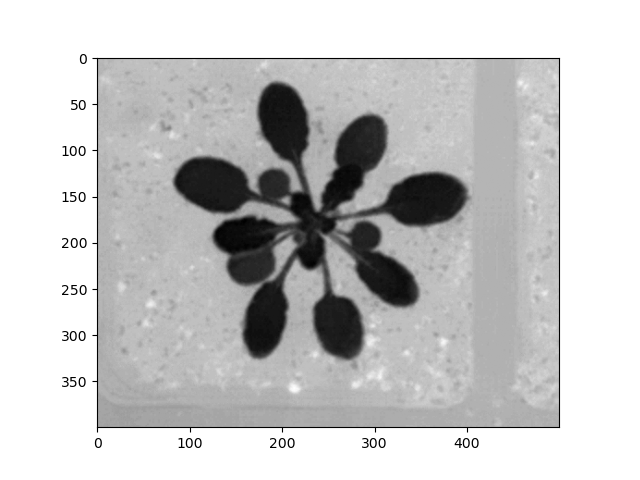

In [14]:
# Convert image from RGB color space to LAB and keep only the green-magenta channel 

a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')

Use `pcv.visualize.histogram` to aid in picking a value for binary threshold (next step).
This step would not go into a workflow when you run it in parallel.

In [15]:
hist_figure1 = pcv.visualize.histogram(a, bins=50)


alt.Chart(...)

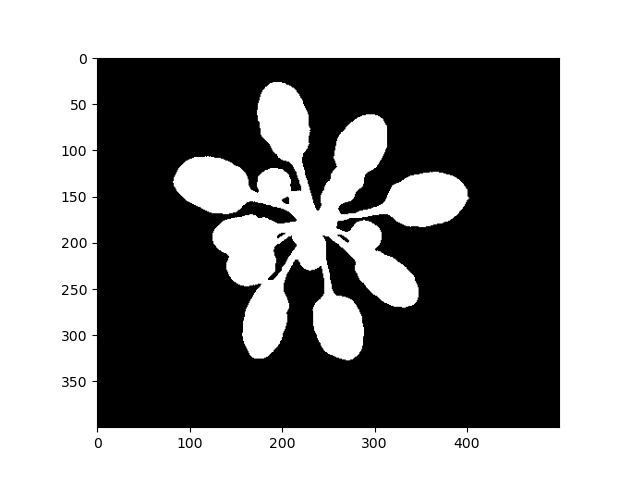

In [16]:
# Set a binary threshold on the image 

img_binary = pcv.threshold.binary(gray_img=a, threshold=110, object_type='dark')


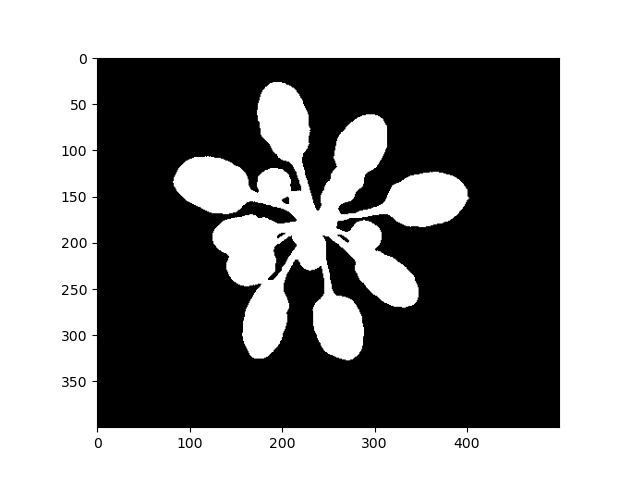

In [17]:
# Fill small noise

fill_image = pcv.fill(bin_img=img_binary, size=200)

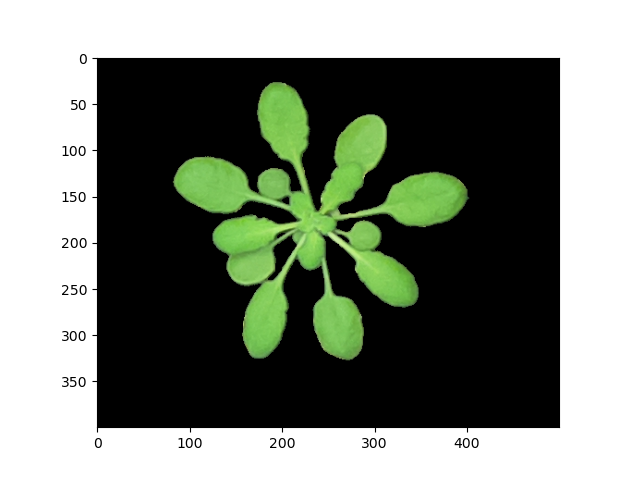

In [18]:
# Apply binary mask to original cropped image

masked = pcv.apply_mask(img=crop_img, mask=fill_image, mask_color="black")

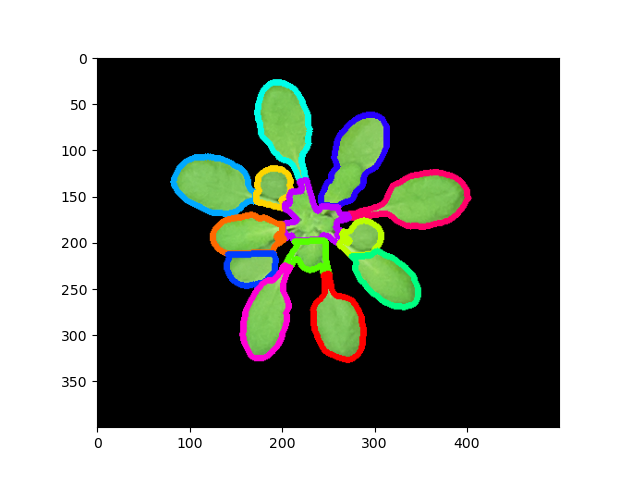

In [19]:
# Apply Watershed Segmentation Function

analysis_images = pcv.watershed_segmentation(rgb_img=masked, mask=fill_image, distance=15, label="default")


Print Number of objects just to see result.
This step would not go into a workflow when you run it in parallel

In [20]:
count=pcv.outputs.observations["default"]["estimated_object_count"]["value"]
print(count)

13


The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
and print an output text file for data analysis. If no functions have been run, it will print an empty text file. For more information see: https://plantcv.readthedocs.io/en/latest/output_measurements/

In [21]:
pcv.outputs.save_results(filename=args.result, outformat="json")